In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data.csv") 
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
data = data.drop(columns=['id', 'Unnamed: 32'])

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis']) 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression(random_state=42)
model.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

In [12]:
y_pred = model.predict(x_test_scaled)
y_proba = model.predict_proba(x_test_scaled)[:, 1]

In [13]:
from sklearn.metrics import *

In [14]:
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", confusion,"\n")
print("Precision:", precision,"\n")
print("Recall:", recall,"\n")
print("ROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[70  1]
 [ 2 41]] 

Precision: 0.9761904761904762 

Recall: 0.9534883720930233 

ROC-AUC Score: 0.99737962659679


In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
thresholds = np.percentile(y_proba, [0, 25, 50, 75, 100]) #percentiles of predicted probabilities.
precisions = []
recalls = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))

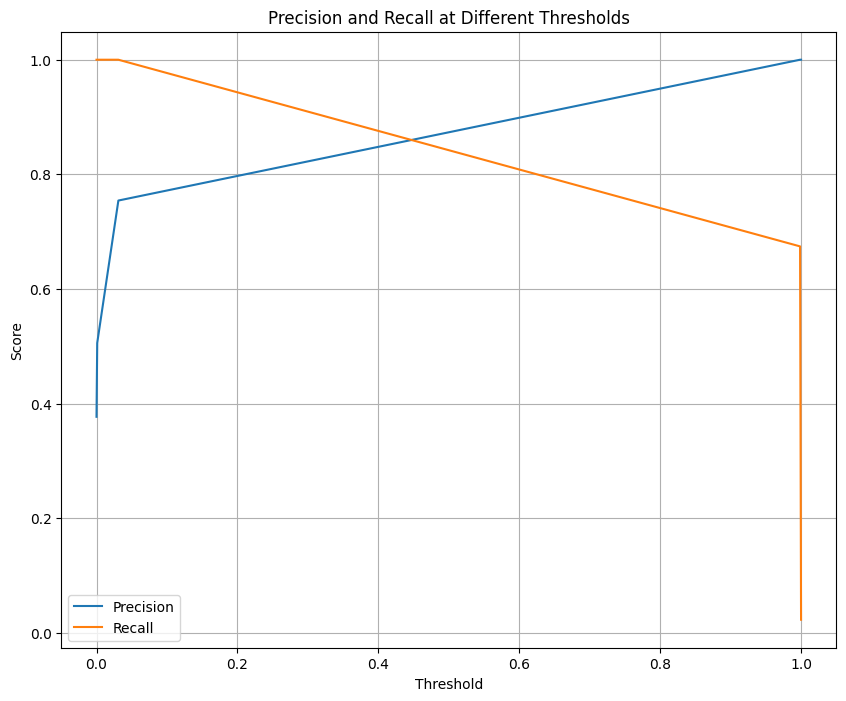

In [17]:
plt.figure(figsize=(10,8))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()